### Par: HOUSNI Kamar

## Projet : Metaheuristic

### Constructive heuristic- Finite Best Strip

* We will start by reading our data;
    * we extract the bin and item dimensions in order to perform our heuristic algorithm on the data.

In [13]:
import matplotlib.pyplot as plt

In [9]:
def read_dataset(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract bin dimensions
    bin_width = None
    bin_height = None
    items = []
    for line in lines:
        if line.startswith('W:'):
            bin_width = int(line.split(':')[1].strip())
        elif line.startswith('H:'):
            bin_height = int(line.split(':')[1].strip())
        elif line.startswith('w:'):
            item_width = int(line.split(':')[1].strip())
            item_height = int(lines[lines.index(line) + 1].split(':')[1].strip())
            items.append((item_width, item_height))

    return bin_width, bin_height, items

In [10]:
def fbs_heuristic(bin_width, bin_height, items):
    # Sort items by non-increasing height
    items.sort(key=lambda x: x[1], reverse=True)

    # Phase 1: Pack items into an infinite height strip
    strip_width = bin_width
    shelves = []
    for item in items:
        shelf_height = item[1]
        # Find the best fit shelf for the item
        best_shelf = None
        best_residual_width = float('inf')
        for shelf in shelves:
            if shelf[0] >= item[0] and shelf[1] < best_residual_width:
                best_shelf = shelf
                best_residual_width = shelf[1]
        if best_shelf is None:
            # Create a new shelf for the item
            shelves.append((item[0], strip_width - item[0]))
        else:
            # Pack the item onto the best fit shelf
            shelves.remove(best_shelf)
            shelves.append((best_shelf[0], best_shelf[1] - item[0]))

    # Phase 2: Pack shelves into finite bins
    bins = []
    for shelf in shelves:
        # Find the best fit bin for the shelf
        best_bin = None
        best_residual_height = float('inf')
        for bin in bins:
            if bin[1] >= shelf[0] and bin[0] < best_residual_height:
                best_bin = bin
                best_residual_height = bin[0]
        if best_bin is None:
            # Create a new bin for the shelf
            bins.append((bin_height - shelf[0], strip_width))
        else:
            # Pack the shelf into the best fit bin
            bins.remove(best_bin)
            bins.append((best_bin[0] - shelf[0], best_bin[1]))

    return len(bins)

In [12]:
bin_width, bin_height, items = read_dataset('instance2dBIN.txt')
print(f"Bin dimensions: {bin_width} x {bin_height}")
print("Item dimensions:")
for item in items:
    print(f"{item[0]} x {item[1]}")

num_bins = fbs_heuristic(bin_width, bin_height, items)
print(f"Number of bins used: {num_bins}")

Bin dimensions: 10 x 10
Item dimensions:
5 x 9
4 x 2
10 x 6
5 x 9
6 x 3
10 x 6
1 x 5
3 x 5
6 x 3
2 x 4
6 x 3
7 x 2
8 x 3
4 x 2
4 x 2
10 x 6
7 x 2
8 x 3
Number of bins used: 1


In [14]:
def visualize_packing(bin_width, bin_height, items, bins):
    fig, ax = plt.subplots()

    # Plot the bins
    ax.set_xlim(0, bin_width)
    ax.set_ylim(0, bin_height)
    ax.set_aspect('equal')
    ax.set_title('Bin Packing')
    for bin in bins:
        ax.add_patch(plt.Rectangle((0, 0), bin_width, bin[0], fill=False, edgecolor='blue'))

    # Plot the packed items
    for bin in bins:
        x = []
        y = []
        for item in items:
            if item in bin[1]:
                x.append(item[0])
                y.append(item[1])
        ax.scatter(x, y, color='red')

    plt.show()

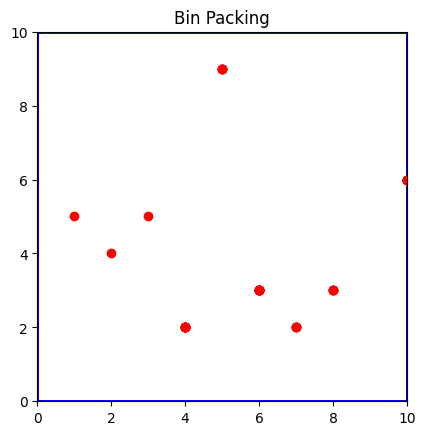

In [15]:
bin_width, bin_height, items = read_dataset('instance2dBIN.txt')
num_bins = fbs_heuristic(bin_width, bin_height, items)
bins = [(bin_height, items[i:i+num_bins]) for i in range(0, len(items), num_bins)]
visualize_packing(bin_width, bin_height, items, bins)

the visualize_packing function creates a visualization of the packing solution. It plots the bins as blue rectangles and the packed items as red dots. The read_dataset and fbs_heuristic functions are used to obtain the bin dimensions, items, and the number of bins used.

In [1]:
#recherche locale 


In [ ]:
def local_search(initial_solution, items, alpha):
    current_solution = initial_solution.copy()
    num_bins = len(current_solution)
    improved = True

    while improved:
        improved = False
        weakest_bin = find_weakest_bin(current_solution, items, alpha)

        for bin_idx in range(num_bins):
            if bin_idx == weakest_bin:
                continue

            for item in current_solution[weakest_bin]:
                if can_move_item(item, current_solution[weakest_bin], current_solution[bin_idx]):
                    current_solution[weakest_bin].remove(item)
                    current_solution[bin_idx].append(item)
                    improved = True
                    break

            if improved:
                break

    return current_solution


def find_weakest_bin(solution, items, alpha):
    weakest_bin = None
    min_difficulty = float('inf')

    for bin_idx, bin_items in enumerate(solution):
        difficulty = calculate_bin_difficulty(bin_items, items, alpha)

        if difficulty < min_difficulty:
            min_difficulty = difficulty
            weakest_bin = bin_idx

    return weakest_bin


def calculate_bin_difficulty(bin_items, items, alpha):
    total_area = sum(item['h'] * item['w'] for item in bin_items)
    bin_height = max(item['h'] for item in bin_items)
    bin_width = sum(item['w'] for item in bin_items)
    bin_difficulty = (alpha * total_area) / (bin_height * bin_width) - len(bin_items) / len(items)

    return bin_difficulty


def can_move_item(item, source_bin, target_bin):
    return (item['h'] <= target_bin['H'] and item['w'] <= target_bin['W']) or \
           (item['h'] <= target_bin['W'] and item['w'] <= target_bin['H'])